In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r"/content/drive/MyDrive/internship/feeds.csv")

In [3]:
df.head()

,created_at,entry_id,field1,field2,field3,latitude,longitude,elevation,status
0,2024-04-24T12:27:34+00:00,1,6.0,3.0,3.0,NaN,NaN,NaN,NaN
1,2024-04-24T12:27:50+00:00,2,5.0,3.0,4.0,NaN,NaN,NaN,NaN
2,2024-04-24T12:28:05+00:00,3,7.0,4.0,4.0,NaN,NaN,NaN,NaN
3,2024-04-24T12:28:21+00:00,4,8.0,5.0,3.0,NaN,NaN,NaN,NaN
4,2024-04-24T12:28:37+00:00,5,5.0,4.0,3.0,NaN,NaN,NaN,NaN


In [4]:
df=df.drop(['latitude','longitude','elevation','status','entry_id'],axis=1)

In [5]:
df.head()

,created_at,field1,field2,field3
0,2024-04-24T12:27:34+00:00,6.0,3.0,3.0
1,2024-04-24T12:27:50+00:00,5.0,3.0,4.0
2,2024-04-24T12:28:05+00:00,7.0,4.0,4.0
3,2024-04-24T12:28:21+00:00,8.0,5.0,3.0
4,2024-04-24T12:28:37+00:00,5.0,4.0,3.0


In [6]:
df.isna().sum() ## there are no null value

,0
created_at,0
field1,0
field2,0
field3,0


In [7]:
# Convert the 'created_at' column to seconds since the epoch
df['created_at_seconds'] = df['created_at'].apply(
    lambda x: int(datetime.fromisoformat(x.replace('Z', '+00:00')).timestamp())
)
base_time=df['created_at_seconds'].iloc[0]
df["relative_time"] = df["created_at_seconds"] - base_time
df.drop(['created_at','created_at_seconds'],axis=1,inplace=True)


In [8]:
df

,field1,field2,field3,relative_time
0,6.0,3.0,3.0,0
1,5.0,3.0,4.0,16
2,7.0,4.0,4.0,31
3,8.0,5.0,3.0,47
4,5.0,4.0,3.0,63
...,...,...,...,...
49570,40.0,0.0,10.0,778781
49571,40.0,0.0,11.0,778797
49572,39.0,0.0,11.0,778812
49573,40.0,0.0,11.0,778828


In [9]:
df_field1=pd.DataFrame(columns=[["field","time"]])
df_field1[["field","time"]]=df[["field1","relative_time"]]

df_field2=pd.DataFrame(columns=[["field","time"]])
df_field2[["field","time"]]=df[["field2","relative_time"]]

df_field3=pd.DataFrame(columns=[["field","time"]])
df_field3[["field","time"]]=df[["field3","relative_time"]]


# Field2

In [10]:
# test train split
df=df_field2.copy()
X=df.iloc[:,1:2].values
y=df.iloc[:,0:1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
# # StandardScalar() is the class used for feature scaling from sklearn library.
X

array([[     0],
       [    16],
       [    31],
       ...,
       [778812],
       [778828],
       [778844]])

In [12]:
y

array([[3.],
       [3.],
       [4.],
       ...,
       [0.],
       [0.],
       [0.]])

## Support Vector Machine

In [ ]:
class model:
  def __init__(self):
    self.sc_X = StandardScaler()
    self.sc_y = StandardScaler()

  def train(self,X_train,y_train):
    X = self.sc_X.fit_transform(X_train)
    y = self.sc_y.fit_transform(y_train)
    self.svm_rbf=SVR(kernel='rbf',C=2000,gamma=1)
    self.svm_rbf.fit(X,y.ravel())

  def predict(self,X_test):
    X_test=self.sc_X.transform(X_test)
    y_pred=self.svm_rbf.predict(X_test)
    y_pred = y_pred.reshape(-1, 1)
    self.y_pred=self.sc_y.inverse_transform(y_pred)
    return self.y_pred

  def evaluate(self,y_test):
    metrics = {
    "Mean Absolute Error (MAE)": mean_absolute_error(y_test, self.y_pred),
    "Mean Squared Error (MSE)": mean_squared_error(y_test, self.y_pred),
    "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, self.y_pred)),
    "R² Score": r2_score(y_test, self.y_pred)
    }
    return pd.DataFrame(metrics.items(), columns=["Metric", "Value"])


In [ ]:
# traing
model1=model()
model1.train(X_train,y_train)

# test predict
y1_test_pred=model1.predict(X_test)
y1_test_performance=model1.evaluate(y_test)

# data predict
y1_pred=model1.predict(X)
y1_performance=model1.evaluate(y)


# ploting
plt.scatter(X, y, color='red', label='Observed Data')
plt.scatter(X, y1_pred, color='blue', label='RBF Kernel')

# performance printing
performance_matrix = model1.evaluate(y_test)
print(performance_matrix)

## Decition Tree

In [ ]:
#  decition tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

class tree_model:
    def __init__(self):
        """
        Initializes the model with StandardScaler for feature scaling.
        """
        self.sc_X = StandardScaler()
        self.sc_y = StandardScaler()

    def train(self, X_train, y_train):
        """
        Trains the Decision Tree Regressor on the scaled data.
        """
        # Scale the features and target
        X = self.sc_X.fit_transform(X_train)
        y = self.sc_y.fit_transform(y_train)

        # Initialize and train the Decision Tree Regressor
        self.tree_regressor = DecisionTreeRegressor(max_depth=15, random_state=42,splitter="random")
        self.tree_regressor.fit(X, y)

    def predict(self, X_test):
        """
        Predicts the target for given test features after scaling.
        """
        # Scale the test features
        X_test = self.sc_X.transform(X_test)

        # Predict and inverse scale the target
        y_pred = self.tree_regressor.predict(X_test)
        y_pred = y_pred.reshape(-1, 1)
        self.y_pred = self.sc_y.inverse_transform(y_pred)
        return self.y_pred

    def evaluate(self, y_test):
      """
      Evaluates the model's performance on test data.
      """
      metrics = {
          "Mean Absolute Error (MAE)": mean_absolute_error(y_test, self.y_pred),
          "Mean Squared Error (MSE)": mean_squared_error(y_test, self.y_pred),
          "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, self.y_pred)),
          "R² Score": r2_score(y_test, self.y_pred)
      }
      self.performance_matrix=pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
      return self.performance_matrix

    def plot_performance_matrix(self,performance_matrix):
        fig, ax = plt.subplots()
        ax.axis('tight')
        ax.axis('off')
        table = ax.table(cellText=performance_matrix.values, colLabels=performance_matrix.columns, loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.auto_set_column_width(col=list(range(len(performance_matrix.columns))))
        plt.show()

In [ ]:
# traing
model1=tree_model()
model1.train(X_train,y_train)

# test predict
y1_test_pred=model1.predict(X_test)
print("Test Performance")
model1.plot_performance_matrix(model1.evaluate(y_test))

# train predict
y1_train_pred=model1.predict(X_train)
print("Train Performance")
model1.plot_performance_matrix(model1.evaluate(y_train))

# data predict
y1_pred=model1.predict(X)
print("model Performance")
model1.plot_performance_matrix(model1.evaluate(y))


# ploting
plt.scatter(X, y, color='red', label='Observed Data')
plt.scatter(X, y1_pred, color='blue', label='RBF Kernel')


## Random Rorest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class random_forest_model:
    def __init__(self):
        """
        Initializes the model with StandardScaler for feature scaling.
        """
        self.sc_X = StandardScaler()
        self.sc_y = StandardScaler()

    def train(self, X_train, y_train):
        """
        Trains the Random Forest Regressor on the scaled data.
        """
        # Scale the features and target
        X = self.sc_X.fit_transform(X_train)
        y = self.sc_y.fit_transform(y_train)

        # Initialize and train the Random Forest Regressor
        self.rf_regressor = RandomForestRegressor(
            n_estimators=100,  # Number of trees
            max_depth=30,      # Maximum depth of each tree
            random_state=42,   # Ensures reproducibility
            n_jobs=-1,          # Utilize all processors for training
            min_samples_split=2,
            min_samples_leaf=1,
            max_features=1,
            bootstrap=True
        )
        self.rf_regressor.fit(X, y.ravel())

    def predict(self, X_test):
        """
        Predicts the target for given test features after scaling.
        """
        # Scale the test features
        X_test = self.sc_X.transform(X_test)

        # Predict and inverse scale the target
        y_pred = self.rf_regressor.predict(X_test)
        y_pred = y_pred.reshape(-1, 1)
        self.y_pred = self.sc_y.inverse_transform(y_pred)
        return self.y_pred

    def evaluate(self, y_test):
        """
        Evaluates the model's performance on test data.
        """
        metrics = {
            "Mean Absolute Error (MAE)": mean_absolute_error(y_test, self.y_pred),
            "Mean Squared Error (MSE)": mean_squared_error(y_test, self.y_pred),
            "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, self.y_pred)),
            "R² Score": r2_score(y_test, self.y_pred)
        }
        self.performance_matrix=pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
        return self.performance_matrix

    def plot_performance_matrix(self,performance_matrix):
        fig, ax = plt.subplots()
        ax.axis('tight')
        ax.axis('off')
        table = ax.table(cellText=performance_matrix.values, colLabels=performance_matrix.columns, loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.auto_set_column_width(col=list(range(len(performance_matrix.columns))))
        plt.show()



In [ ]:
# traing
model1=random_forest_model()
model1.train(X_train,y_train)

# test predict
y1_test_pred=model1.predict(X_test)
print("Test Performance")
model1.plot_performance_matrix(model1.evaluate(y_test))

# train predict
y1_train_pred=model1.predict(X_train)
print("Train Performance")
model1.plot_performance_matrix(model1.evaluate(y_train))

# data predict
y1_pred=model1.predict(X)
print("model Performance")
model1.plot_performance_matrix(model1.evaluate(y))


# ploting
plt.scatter(X, y, color='red', label='Observed Data')
plt.scatter(X, y1_pred, color='blue', label='RBF Kernel')


## Radge Regration

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class ridge_lasso_model:
    def __init__(self, model_type='ridge', alpha=1.0):
        """
        Initializes the model with StandardScaler for feature scaling and either Ridge or Lasso model.
        :param model_type: 'ridge' for Ridge regression, 'lasso' for Lasso regression
        :param alpha: Regularization strength; larger values mean more regularization
        """
        self.sc_X = StandardScaler()
        self.sc_y = StandardScaler()

        # Initialize the model (Ridge or Lasso)
        if model_type == 'ridge':
            self.model = Ridge(alpha=alpha, random_state=42)
        elif model_type == 'lasso':
            self.model = Lasso(alpha=alpha, random_state=42)
        else:
            raise ValueError("model_type must be 'ridge' or 'lasso'")

    def train(self, X_train, y_train):
        """
        Trains the Ridge or Lasso model on the scaled data.
        """
        # Scale the features and target
        X = self.sc_X.fit_transform(X_train)
        y = self.sc_y.fit_transform(y_train)

        # Train the Ridge or Lasso model
        self.model.fit(X, y.ravel())

    def predict(self, X_test):
        """
        Predicts the target for given test features after scaling.
        """
        # Scale the test features
        X_test = self.sc_X.transform(X_test)

        # Predict and inverse scale the target
        y_pred = self.model.predict(X_test)
        y_pred = y_pred.reshape(-1, 1)
        self.y_pred = self.sc_y.inverse_transform(y_pred)
        return self.y_pred

    def evaluate(self, y_test):
        """
        Evaluates the model's performance on test data.
        """
        metrics = {
            "Mean Absolute Error (MAE)": mean_absolute_error(y_test, self.y_pred),
            "Mean Squared Error (MSE)": mean_squared_error(y_test, self.y_pred),
            "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, self.y_pred)),
            "R² Score": r2_score(y_test, self.y_pred)
        }
        self.performance_matrix = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
        return self.performance_matrix

    def plot_performance_matrix(self, performance_matrix):
        fig, ax = plt.subplots()
        ax.axis('tight')
        ax.axis('off')
        table = ax.table(cellText=performance_matrix.values, colLabels=performance_matrix.columns, loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.auto_set_column_width(col=list(range(len(performance_matrix.columns))))
        plt.show()


In [ ]:
# traing
model1=ridge_lasso_model(model_type='lasso')
model1.train(X_train,y_train)

# test predict
y1_test_pred=model1.predict(X_test)
print("Test Performance")
model1.plot_performance_matrix(model1.evaluate(y_test))

# train predict
y1_train_pred=model1.predict(X_train)
print("Train Performance")
model1.plot_performance_matrix(model1.evaluate(y_train))

# data predict
y1_pred=model1.predict(X)
print("model Performance")
model1.plot_performance_matrix(model1.evaluate(y))


# ploting
plt.scatter(X, y, color='red', label='Observed Data')
plt.scatter(X, y1_pred, color='blue', label='RBF Kernel')


## All Regression

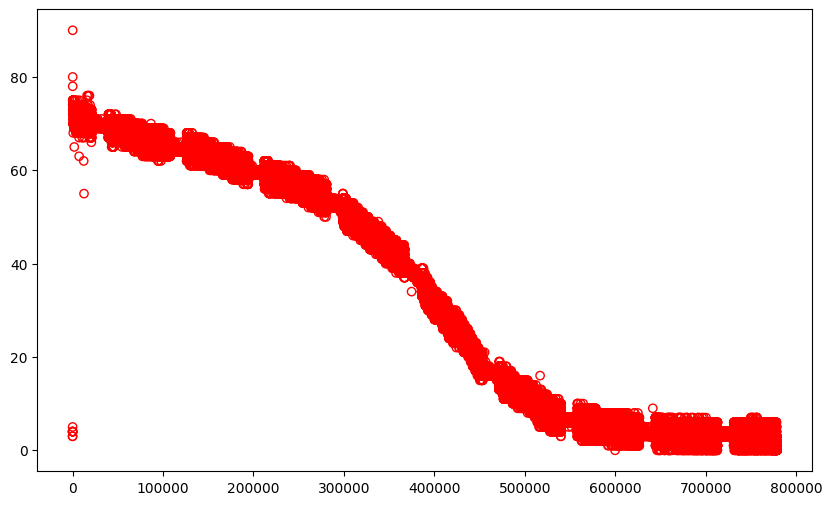

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Observed Data',facecolors='none', edgecolors='red')
plt.savefig('Field2_Observed.png')
plt.show()

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class MultiRegressor:
    def __init__(self, model_type='decision_tree', alpha=1.0, degree=2):
        """
        Initializes the model with StandardScaler for feature scaling and selected regression model.
        :param model_type: String representing the type of model to use ('decision_tree', 'random_forest',
                            'svm', 'ridge', 'lasso', 'linear', 'polynomial')
        :param alpha: Regularization strength for Ridge and Lasso
        :param degree: Degree of polynomial features for Polynomial Regression
        """
        self.sc_X = StandardScaler()
        self.sc_y = StandardScaler()
        self.model_type = model_type
        self.degree = degree

        if model_type == 'decision_tree':
            self.model =  DecisionTreeRegressor(
                max_depth=25,
                random_state=42,
                splitter="random")


        elif model_type == 'random_forest':
            self.model =  RandomForestRegressor(
            n_estimators=100,  # Number of trees
            max_depth=30,      # Maximum depth of each tree
            random_state=42,   # Ensures reproducibility
            n_jobs=-1,          # Utilize all processors for training
            min_samples_split=2,
            min_samples_leaf=1,
            max_features=1,
            bootstrap=True
        )

        elif model_type == 'svm':
            self.model = self.svm_rbf=SVR(
                kernel='rbf',
                C=2000,
                gamma=1
            )

        elif model_type == 'ridge':
            self.model = Ridge(alpha=alpha, random_state=42)
        elif model_type == 'lasso':
            self.model = Lasso(alpha=alpha, random_state=42)
        elif model_type == 'linear':
            self.model = LinearRegression()
        elif model_type == 'polynomial':
            self.poly = PolynomialFeatures(degree=self.degree)
            self.model = LinearRegression()
        else:
            raise ValueError("Invalid model_type. Choose from ['decision_tree', 'random_forest', 'svm', 'ridge', 'lasso', 'linear', 'polynomial']")

    def train(self, X_train, y_train):
        """
        Trains the selected regression model on the scaled data.
        """
        X = self.sc_X.fit_transform(X_train)
        y = self.sc_y.fit_transform(y_train)

        if self.model_type == 'polynomial':
            X_poly = self.poly.fit_transform(X)
            self.model.fit(X_poly, y)
        else:
            self.model.fit(X, y.ravel())

    def predict(self, X_test):
        """
        Predicts the target for given test features after scaling.
        """
        X_test = self.sc_X.transform(X_test)

        if self.model_type == 'polynomial':
            X_test_poly = self.poly.transform(X_test)
            y_pred = self.model.predict(X_test_poly)
        else:
            y_pred = self.model.predict(X_test)

        y_pred = y_pred.reshape(-1, 1)
        self.y_pred = self.sc_y.inverse_transform(y_pred)
        return self.y_pred

    def evaluate(self, y_test):
        """
        Evaluates the model's performance on test data.
        """
        metrics = {
            "Mean Absolute Error (MAE)": mean_absolute_error(y_test, self.y_pred),
            "Mean Squared Error (MSE)": mean_squared_error(y_test, self.y_pred),
            "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, self.y_pred)),
            "R² Score": r2_score(y_test, self.y_pred)
        }
        self.performance_matrix = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
        return self.performance_matrix

    def R2_mse(self, y_test):
        R2 = r2_score(y_test, self.y_pred)
        MSE = np.sqrt(mean_squared_error(y_test, self.y_pred))
        return R2, MSE

    def plot_performance_matrix(self, performance_matrix):
        fig, ax = plt.subplots()
        ax.axis('tight')
        ax.axis('off')
        table = ax.table(cellText=performance_matrix.values, colLabels=performance_matrix.columns, loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.auto_set_column_width(col=list(range(len(performance_matrix.columns))))
        plt.show()


Test Performance


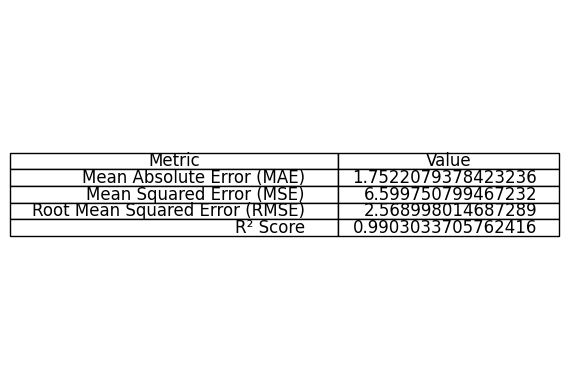

Train Performance


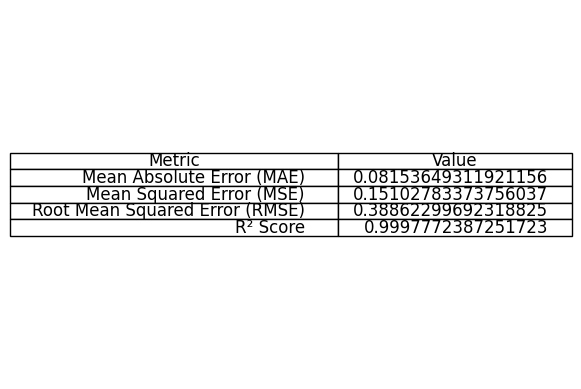

model Performance


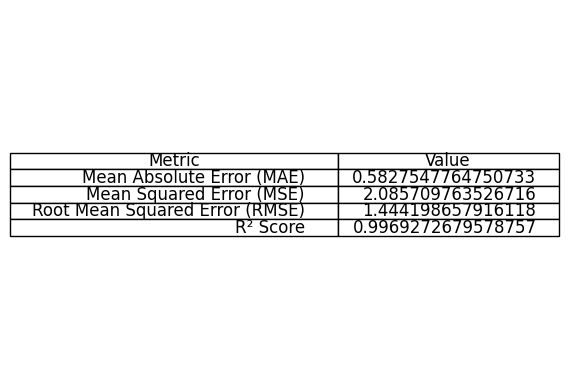

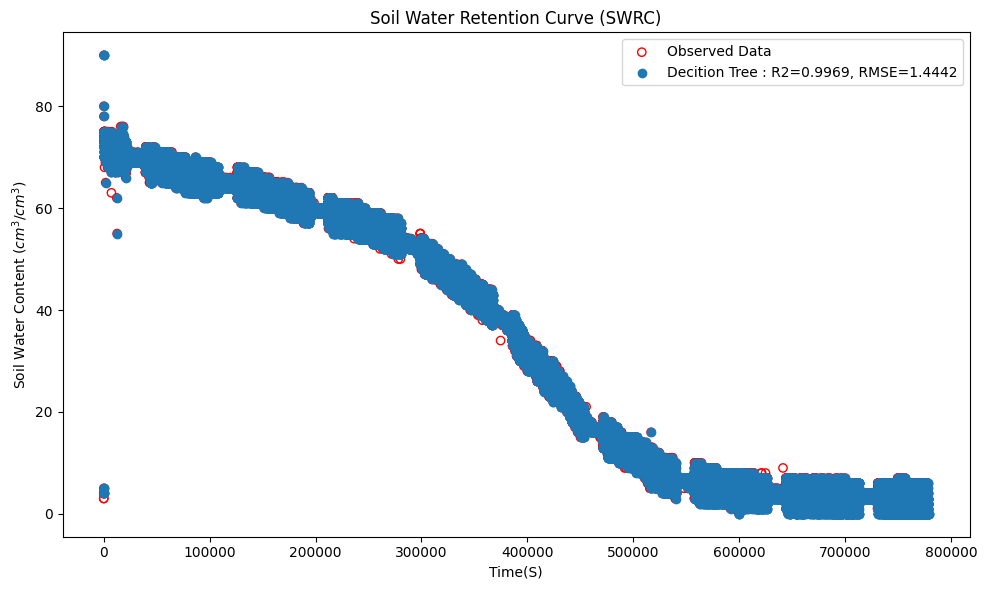

In [20]:
# decition Tree
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# traing
model_decition_tree=MultiRegressor(model_type='decision_tree')
model_decition_tree.train(X_train,y_train)

# test predict
y1_test_pred_decition_tree=model_decition_tree.predict(X_test)
print("Test Performance")
model_decition_tree.plot_performance_matrix(model_decition_tree.evaluate(y_test))

# train predict
y1_train_pred_decition_tree=model_decition_tree.predict(X_train)
print("Train Performance")
model_decition_tree.plot_performance_matrix(model_decition_tree.evaluate(y_train))

# data predict
y1_pred_decition_tree=model_decition_tree.predict(X)
print("model Performance")
model_decition_tree.plot_performance_matrix(model_decition_tree.evaluate(y))
R2_decition_tree,RMSE_decition_tree=model_decition_tree.R2_mse(y)


# ploting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Observed Data',facecolors='none', edgecolors='red')
plt.scatter(X, y1_pred_decition_tree, label=f'Decition Tree : R2={R2_decition_tree:.4f}, RMSE={RMSE_decition_tree:.4f}')

plt.xlabel('Time(S)')
plt.ylabel('Soil Water Content ($cm^3$/$cm^3$)')
plt.legend() # to show label
plt.title('Soil Water Retention Curve (SWRC)')
plt.tight_layout()

# # Save and show the plot
plt.savefig('Field2_Decition_Tree.png')
plt.show()

Test Performance


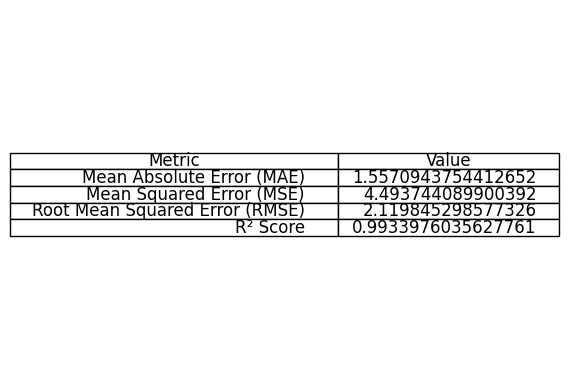

Train Performance


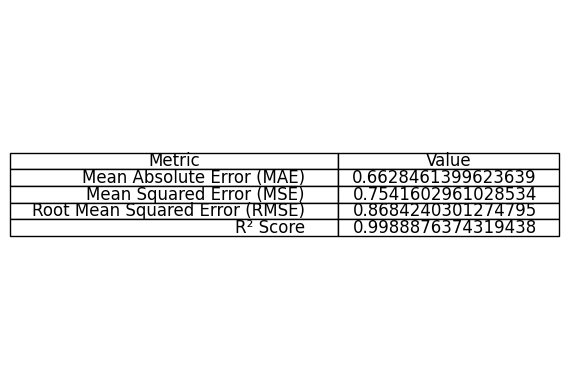

model Performance


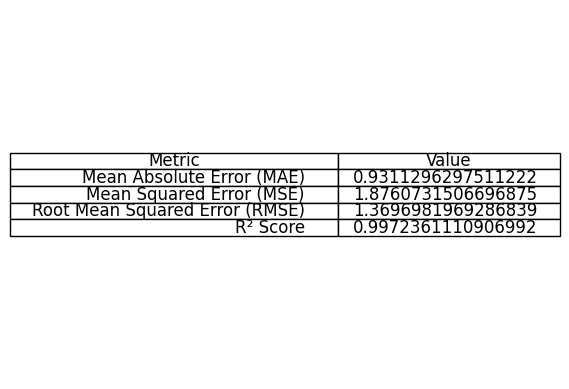

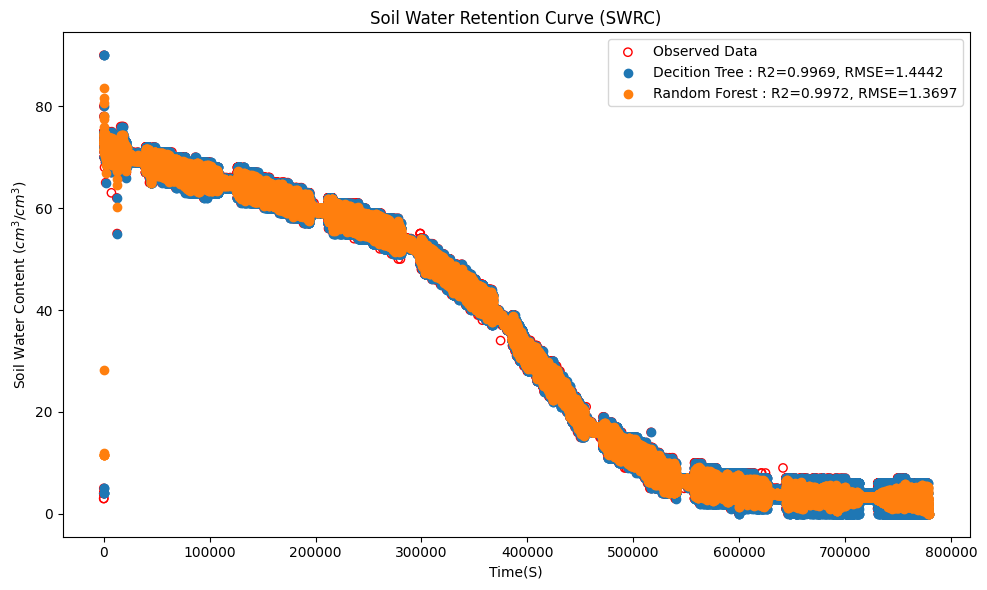

In [21]:
# random Forast Tree
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# traing
model_random_forest=MultiRegressor(model_type='random_forest')
model_random_forest.train(X_train,y_train)

# test predict
y1_test_pred_random_forest=model_random_forest.predict(X_test)
print("Test Performance")
model_random_forest.plot_performance_matrix(model_random_forest.evaluate(y_test))

# train predict
y1_train_pred_random_forest=model_random_forest.predict(X_train)
print("Train Performance")
model_random_forest.plot_performance_matrix(model_random_forest.evaluate(y_train))

# data predict
y1_pred_random_forest=model_random_forest.predict(X)
print("model Performance")
model_random_forest.plot_performance_matrix(model_random_forest.evaluate(y))
R2_random_forest,RMSE_random_forest=model_random_forest.R2_mse(y)


# ploting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Observed Data',facecolors='none', edgecolors='red')
plt.scatter(X, y1_pred_decition_tree,  label=f'Decition Tree : R2={R2_decition_tree:.4f}, RMSE={RMSE_decition_tree:.4f}')
plt.scatter(X, y1_pred_random_forest,  label=f'Random Forest : R2={R2_random_forest:.4f}, RMSE={RMSE_random_forest:.4f}')

plt.xlabel('Time(S)')
plt.ylabel('Soil Water Content ($cm^3$/$cm^3$)')
plt.legend() # to show label
plt.title('Soil Water Retention Curve (SWRC)')
plt.tight_layout()

# Save and show the plot
plt.savefig('Field2_Random_Forest.png')
plt.show()

Test Performance


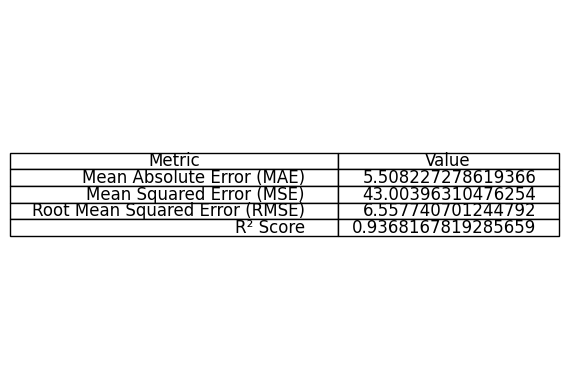

Train Performance


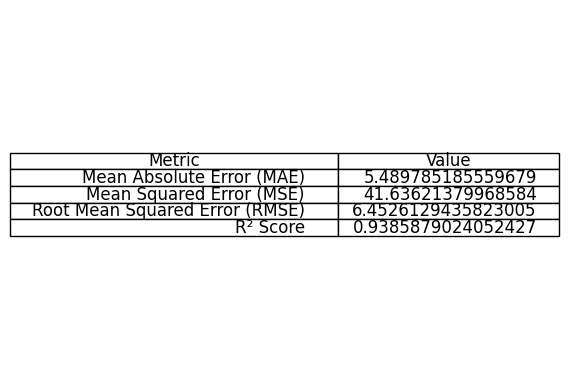

model Performance


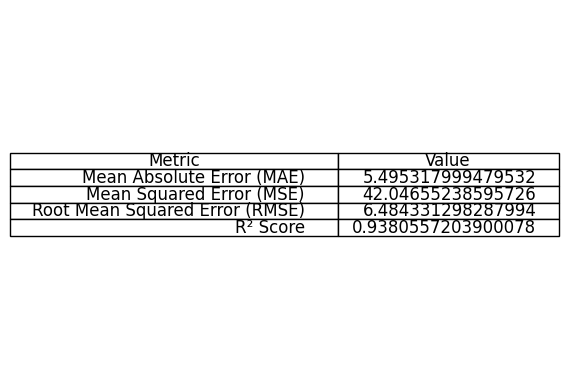

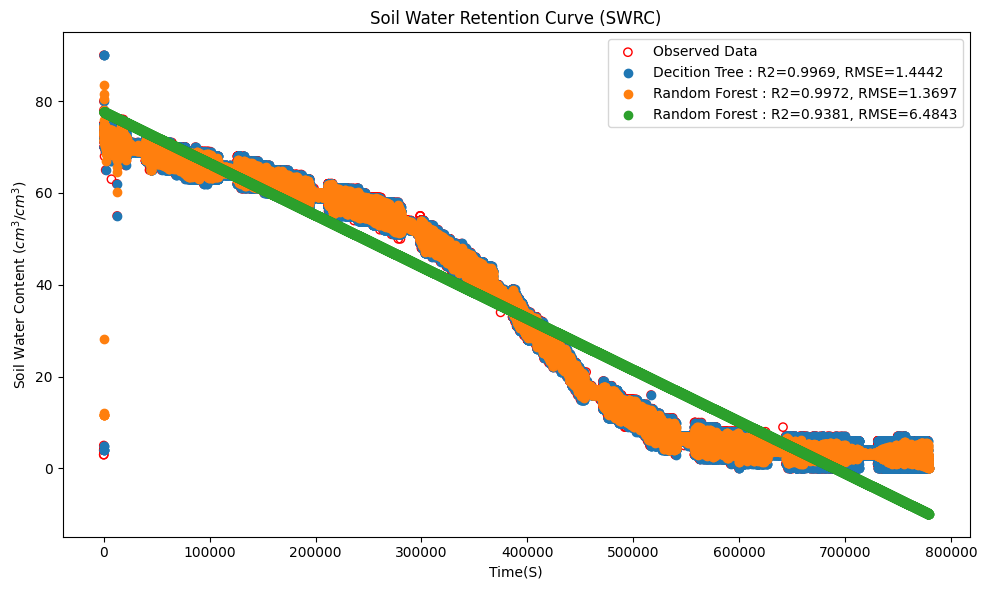

In [22]:
# Ridge rigrassion
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# traing
model_ridge=MultiRegressor(model_type='ridge')
model_ridge.train(X_train,y_train)

# test predict
y1_test_pred_ridge=model_ridge.predict(X_test)
print("Test Performance")
model_ridge.plot_performance_matrix(model_ridge.evaluate(y_test))

# train predict
y1_train_pred_ridge=model_ridge.predict(X_train)
print("Train Performance")
model_ridge.plot_performance_matrix(model_ridge.evaluate(y_train))

# data predict
y1_pred_ridge=model_ridge.predict(X)
print("model Performance")
model_ridge.plot_performance_matrix(model_ridge.evaluate(y))
R2_ridge,RMSE_ridge=model_ridge.R2_mse(y)


# ploting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Observed Data',facecolors='none', edgecolors='red')
plt.scatter(X, y1_pred_decition_tree, label=f'Decition Tree : R2={R2_decition_tree:.4f}, RMSE={RMSE_decition_tree:.4f}')
plt.scatter(X, y1_pred_random_forest, label=f'Random Forest : R2={R2_random_forest:.4f}, RMSE={RMSE_random_forest:.4f}')
plt.scatter(X, y1_pred_ridge,  label=f'Random Forest : R2={R2_ridge:.4f}, RMSE={RMSE_ridge:.4f}')


plt.xlabel('Time(S)')
plt.ylabel('Soil Water Content ($cm^3$/$cm^3$)')
plt.legend() # to show label
plt.title('Soil Water Retention Curve (SWRC)')
plt.tight_layout()

# Save and show the plot
plt.savefig('Field2_Ridge_rigrassion.png')
plt.show()

Test Performance


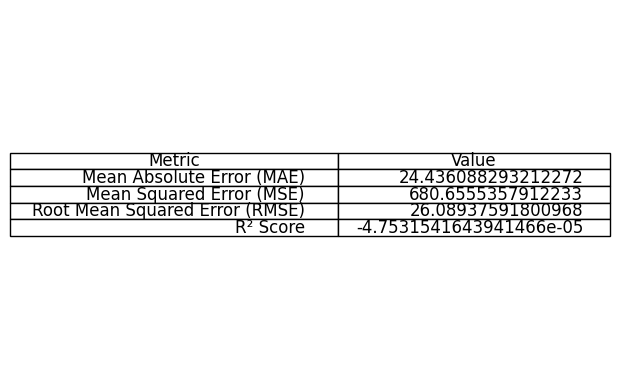

Train Performance


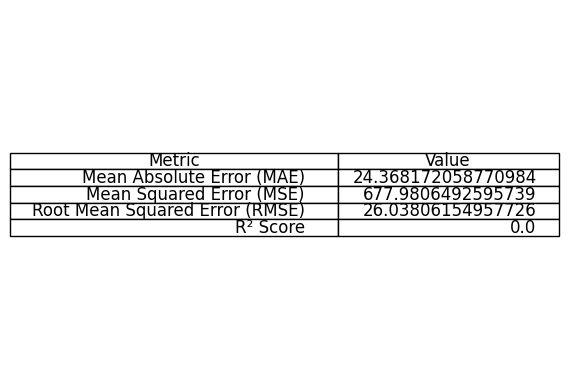

model Performance


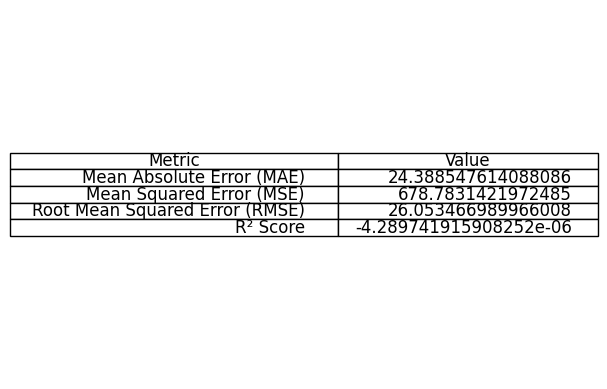

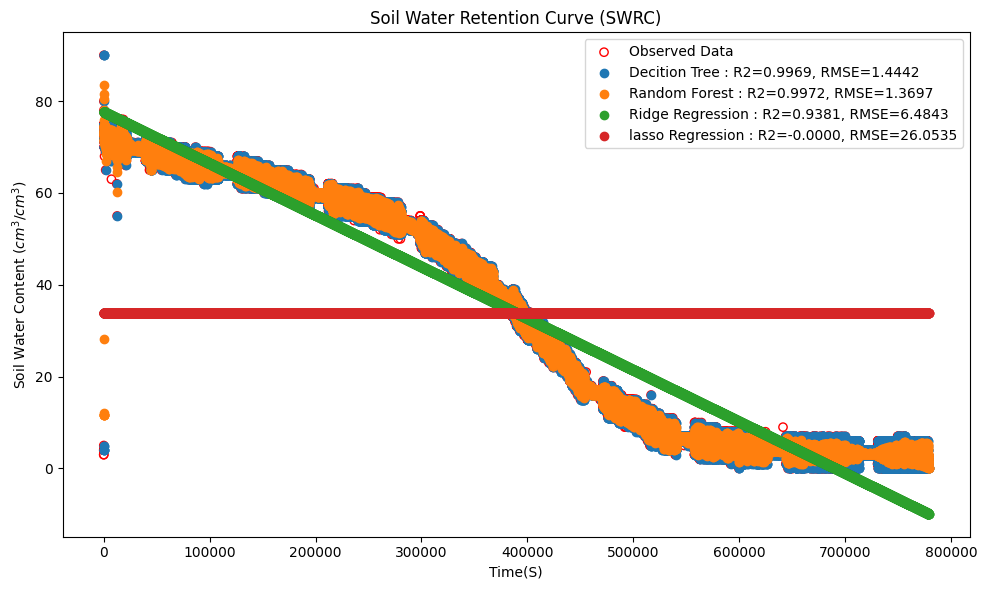

In [23]:
# Lasso rigrassion
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# ['decision_tree', 'random_forest', 'svm', 'ridge', 'lasso', 'linear', 'polynomial']7# traing
model_lasso=MultiRegressor(model_type='lasso')
model_lasso.train(X_train,y_train)

# test predict
y1_test_pred_lasso=model_lasso.predict(X_test)
print("Test Performance")
model_lasso.plot_performance_matrix(model_lasso.evaluate(y_test))

# train predict
y1_train_pred_lasso=model_lasso.predict(X_train)
print("Train Performance")
model_lasso.plot_performance_matrix(model_lasso.evaluate(y_train))

# data predict
y1_pred_lasso=model_lasso.predict(X)
print("model Performance")
model_lasso.plot_performance_matrix(model_lasso.evaluate(y))
R2_lasso,RMSE_lasso=model_lasso.R2_mse(y)


# ploting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Observed Data',facecolors='none', edgecolors='red')
plt.scatter(X, y1_pred_decition_tree,  label=f'Decition Tree : R2={R2_decition_tree:.4f}, RMSE={RMSE_decition_tree:.4f}')
plt.scatter(X, y1_pred_random_forest,  label=f'Random Forest : R2={R2_random_forest:.4f}, RMSE={RMSE_random_forest:.4f}')
plt.scatter(X, y1_pred_ridge,  label=f'Ridge Regression : R2={R2_ridge:.4f}, RMSE={RMSE_ridge:.4f}')
plt.scatter(X, y1_pred_lasso,  label=f'lasso Regression : R2={R2_lasso:.4f}, RMSE={RMSE_lasso:.4f}')



plt.xlabel('Time(S)')
plt.ylabel('Soil Water Content ($cm^3$/$cm^3$)')
plt.legend() # to show label
plt.title('Soil Water Retention Curve (SWRC)')
plt.tight_layout()

# Save and show the plot
plt.savefig('Field2_Lasso_rigrassion.png')
plt.show()

Test Performance


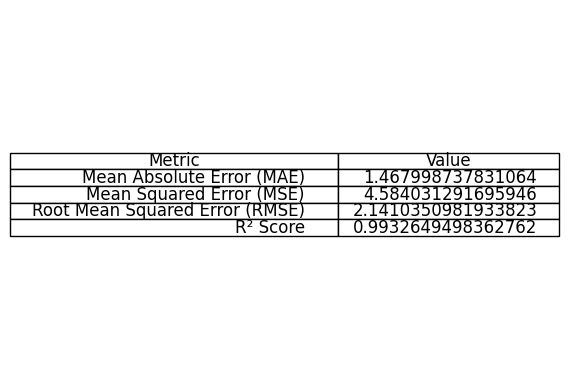

Train Performance


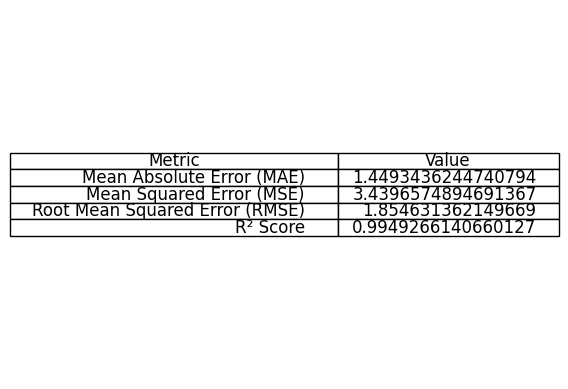

model Performance


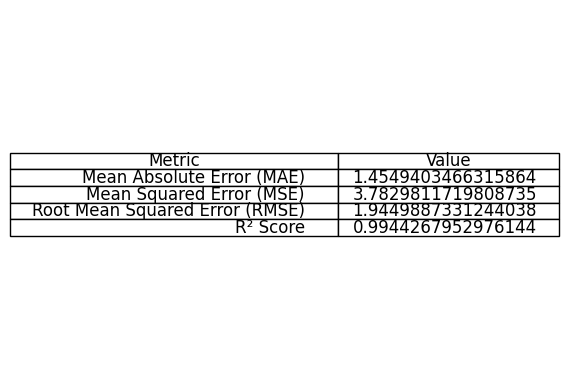

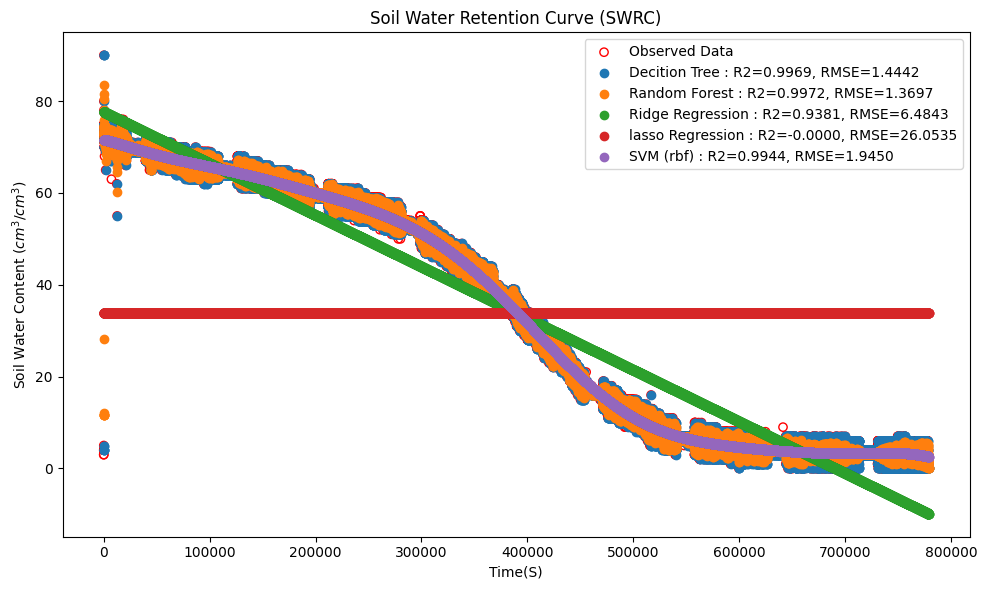

In [24]:
# Support Vector Machine
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# ['decision_tree', 'random_forest', 'svm', 'ridge', 'lasso', 'linear', 'polynomial']7# traing
model_svm=MultiRegressor(model_type='svm')
model_svm.train(X_train,y_train)

# test predict
y1_test_pred_svm=model_svm.predict(X_test)
print("Test Performance")
model_svm.plot_performance_matrix(model_svm.evaluate(y_test))

# train predict
y1_train_pred_svm=model_svm.predict(X_train)
print("Train Performance")
model_svm.plot_performance_matrix(model_svm.evaluate(y_train))

# data predict
y1_pred_svm=model_svm.predict(X)
print("model Performance")
model_svm.plot_performance_matrix(model_svm.evaluate(y))
R2_svm,RMSE_svm=model_svm.R2_mse(y)


# ploting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Observed Data',facecolors='none', edgecolors='red')
plt.scatter(X, y1_pred_decition_tree,  label=f'Decition Tree : R2={R2_decition_tree:.4f}, RMSE={RMSE_decition_tree:.4f}')
plt.scatter(X, y1_pred_random_forest,  label=f'Random Forest : R2={R2_random_forest:.4f}, RMSE={RMSE_random_forest:.4f}')
plt.scatter(X, y1_pred_ridge,  label=f'Ridge Regression : R2={R2_ridge:.4f}, RMSE={RMSE_ridge:.4f}')
plt.scatter(X, y1_pred_lasso,  label=f'lasso Regression : R2={R2_lasso:.4f}, RMSE={RMSE_lasso:.4f}')
plt.scatter(X, y1_pred_svm, label=f'SVM (rbf) : R2={R2_svm:.4f}, RMSE={RMSE_svm:.4f}')


plt.xlabel('Time(S)')
plt.ylabel('Soil Water Content ($cm^3$/$cm^3$)')
plt.legend() # to show label
plt.title('Soil Water Retention Curve (SWRC)')
plt.tight_layout()

# Save and show the plot
plt.savefig('Field2_SVM(rbf).png')
plt.show()